In [1]:
import networkx as nx

In [2]:
G = nx.karate_club_graph()


1
2
3
4
5
6
7
8
10
11
12
13
17
19
21
31
2
3
7
13
17
19
21
30
3
7
8
9
13
27
28
32
7
12
13
6
10
6
10
16
16
30
32
33
33
33
32
33
32
33
32
33
33
32
33
32
33
25
27
29
32
33
25
27
31
31
29
33
33
31
33
32
33
32
33
32
33
33


In [3]:
G = nx.Graph()
H = nx.DiGraph()

G.name = 'Bar'
G.graph

{'name': 'Bar'}

In [4]:
G.add_node(0, feature=[0,1,2], label = 0)
G.nodes[0]

{'feature': [0, 1, 2], 'label': 0}

In [5]:
G.add_nodes_from([
    (1, {'feature':2, 'label':1}),
    (2, {'feature':3, 'label':2})
])

for node in G.nodes(data=True):
    print(node)

node_num = G.number_of_nodes()
print(f'G has {node_num} nodes')

(0, {'feature': [0, 1, 2], 'label': 0})
(1, {'feature': 2, 'label': 1})
(2, {'feature': 3, 'label': 2})
G has 3 nodes


In [6]:
G.add_edge(0, 1, weight = 0.5)
print(f"Edge[(0, 1)] has attributes {G.edges[(0, 1)]}")

Edge[(0, 1)] has attributes {'weight': 0.5}


In [7]:
G.add_edges_from([
    (1, 2, {'weight': 0.3}),
    (2, 0, {'weight': 0.7})
])

for edge in G.edges(data=True):
    print(edge)

(0, 1, {'weight': 0.5})
(0, 2, {'weight': 0.7})
(1, 2, {'weight': 0.3})


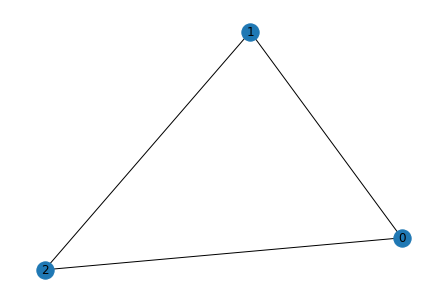

In [8]:
nx.draw(G, with_labels = True)

In [9]:
node_id = 1
#degree of node 1
print(f"Node {node_id} has degree {G.degree[node_id]}")

for neighbor in G.neighbors(node_id):
    print(f"Node {node_id} has neighbor {neighbor}")

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


{0: 0.13131606027447748,
 1: 0.2473678794510449,
 2: 0.24263212054895497,
 3: 0.2473678794510449,
 4: 0.13131606027447748}

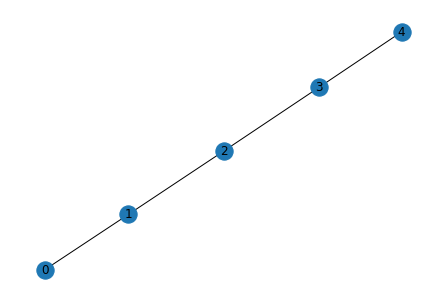

In [10]:
num_of_nodes = 5
G = nx.Graph(nx.path_graph(num_of_nodes))
nx.draw(G, with_labels = True)

pr = nx.pagerank(G, alpha=0.9, max_iter=1000)
pr

In [11]:
import torch

In [12]:
print(f'torch version is {torch.__version__}')

torch version is 1.10.2


In [13]:
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt
def visualization(h, color, epoch=None, loss=None, accuracy=None):
    plt.figure(figsize=(7, 7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap='Set2')
        if epoch is not None and loss is not None and accuracy['train'] is not None and accuracy['val'] is not None:
            plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
                       f'Training Accuracy: {accuracy["train"]*100:.2f}% \n'
                       f' Validation Accuracy: {accuracy["val"]*100:.2f}%'),
                       fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False, 
                            node_color=color, cmap='Set2')
    plt.show()

In [14]:
from torch_geometric.datasets import KarateClub
dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [28]:
data = dataset[0]
print(data)
print('========================================================')

print(f"Data description: {data.is_cuda}")
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Average node degree: {2*data.num_edges / data.num_nodes : .2f}")
print(f"Number of training node: {data.train_mask.sum()}")
print(f"Trainning nodes rate: {data.train_mask.sum()/data.num_nodes:.2f}")
print(f"Contain isolated nodes: {data.has_isolated_nodes()}")
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Data description: False
Number of nodes: 34
Number of edges: 156
Average node degree:  9.18
Number of training node: 4
Trainning nodes rate: 0.12
Contain isolated nodes: False
Contains self-loops: False
Is undirected: True


In [36]:
data.edge_index.T

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

In [48]:
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [50]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.T)

<IPython.core.display.Javascript object>

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

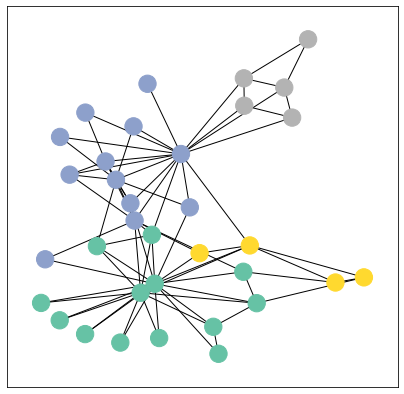

In [53]:
from torch_geometric.utils import to_networkx
G = to_networkx(data, to_undirected=True)
visualization(G, color=data.y)

In [89]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
from torch.nn import Softmax
import torch.nn as nn

input_dim = data.num_features
hidden_dim = 4
num_layers = 3
class GCN(nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(19260817)
        self.classifier = Linear(2, dataset.num_classes)
        self.softmax = nn.Softmax(1)
        self.convs = nn.ModuleList()
        self.convs.append(GCNConv(input_dim, hidden_dim))
        self.convs.append(GCNConv(hidden_dim, hidden_dim))
        self.convs.append(GCNConv(hidden_dim, 2))
        self.relu = torch.nn.ReLU()
    
    def forward(self, x, edge_index):
        for i in range(num_layers):
            x = self.convs[i](x, edge_index)
            x = x.sigmoid()
        
        embeddings = x
        # Apply a final (linear) classifier.
        out = self.softmax(self.classifier(embeddings))
        
        return out, embeddings

model = GCN()
print(model)

GCN(
  (classifier): Linear(in_features=2, out_features=4, bias=True)
  (softmax): Softmax(dim=1)
  (convs): ModuleList(
    (0): GCNConv(34, 4)
    (1): GCNConv(4, 4)
    (2): GCNConv(4, 2)
  )
  (relu): ReLU()
)


Embedding shape: [34, 2]
tensor([[0.2615, 0.1239, 0.2983, 0.3163],
        [0.2578, 0.1224, 0.3001, 0.3197],
        [0.2583, 0.1228, 0.3000, 0.3190],
        [0.2561, 0.1218, 0.3011, 0.3210],
        [0.2549, 0.1214, 0.3016, 0.3221],
        [0.2561, 0.1219, 0.3010, 0.3210],
        [0.2561, 0.1219, 0.3011, 0.3210],
        [0.2547, 0.1214, 0.3018, 0.3221],
        [0.2554, 0.1218, 0.3015, 0.3213],
        [0.2535, 0.1208, 0.3024, 0.3234],
        [0.2549, 0.1214, 0.3016, 0.3221],
        [0.2531, 0.1205, 0.3025, 0.3239],
        [0.2534, 0.1207, 0.3024, 0.3235],
        [0.2553, 0.1217, 0.3016, 0.3214],
        [0.2536, 0.1209, 0.3023, 0.3231],
        [0.2536, 0.1209, 0.3023, 0.3231],
        [0.2546, 0.1211, 0.3017, 0.3225],
        [0.2535, 0.1208, 0.3024, 0.3234],
        [0.2536, 0.1209, 0.3023, 0.3231],
        [0.2541, 0.1212, 0.3022, 0.3226],
        [0.2536, 0.1209, 0.3023, 0.3231],
        [0.2535, 0.1208, 0.3024, 0.3234],
        [0.2537, 0.1209, 0.3023, 0.3231],
        [

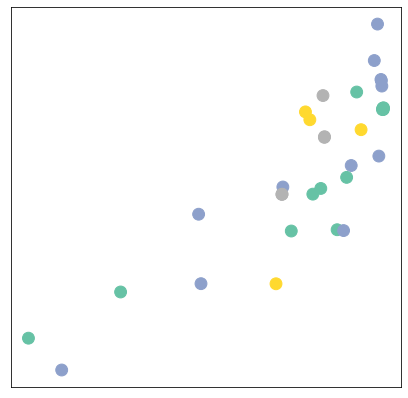

In [90]:
model = GCN()

out , h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')
print(out)
visualization(h, color=data.y)

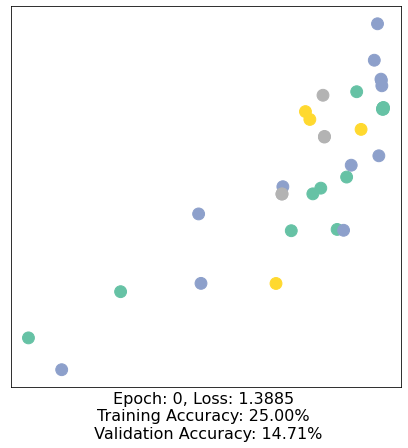

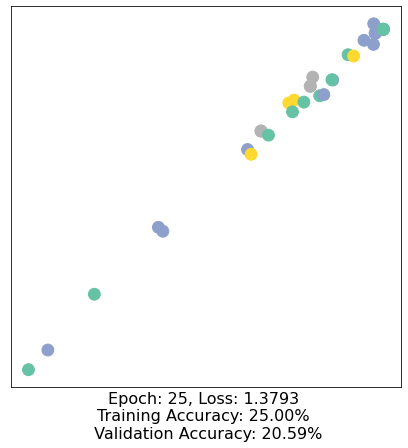

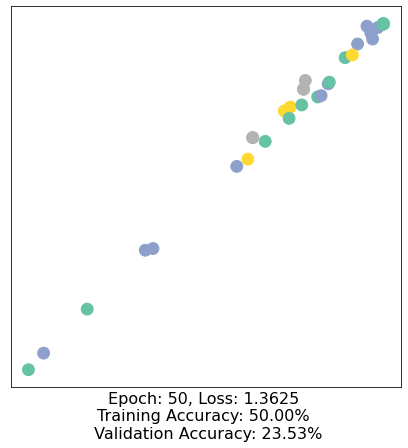

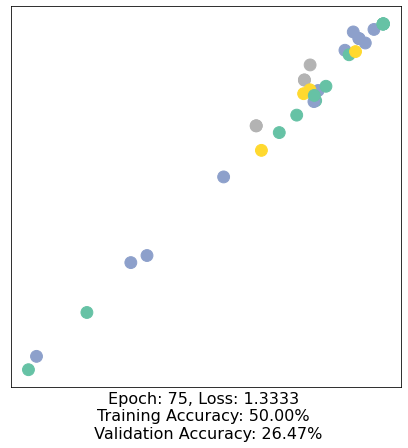

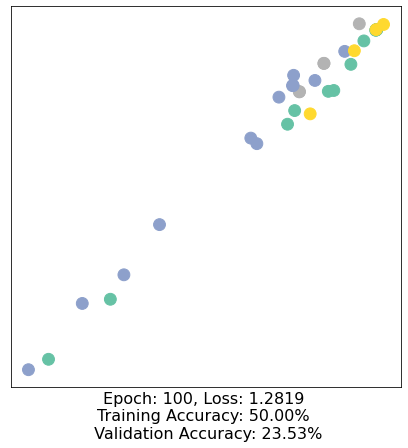

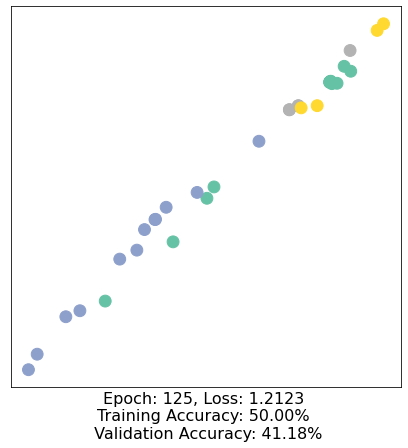

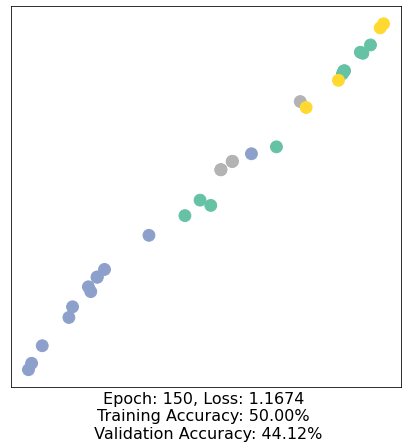

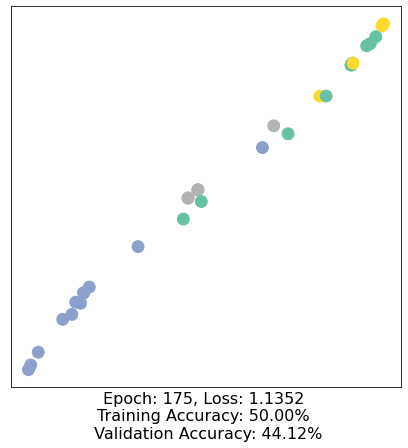

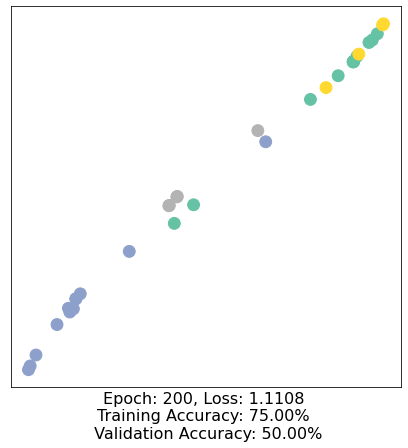

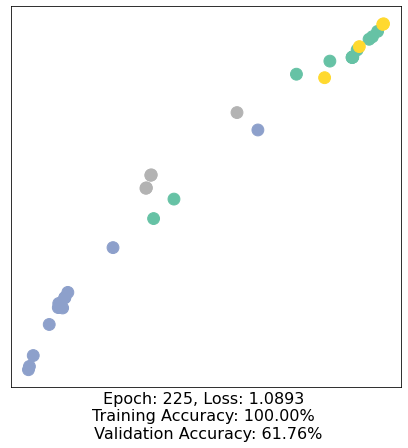

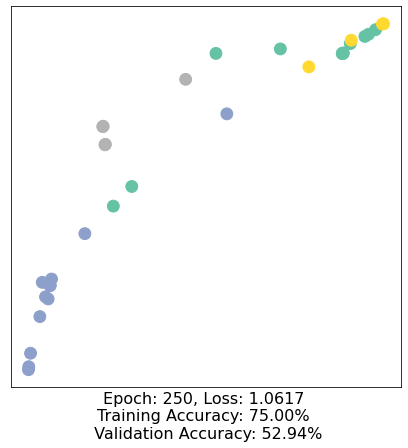

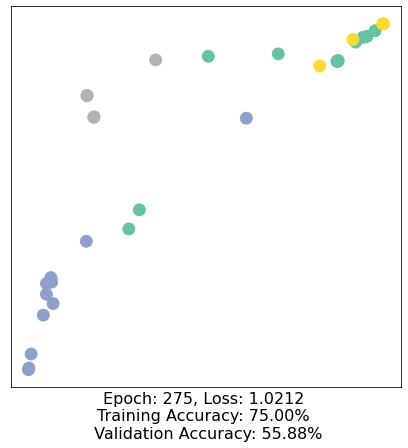

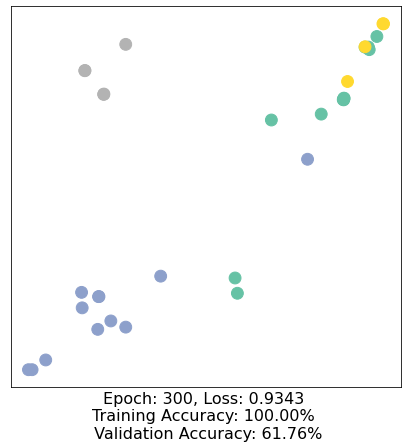

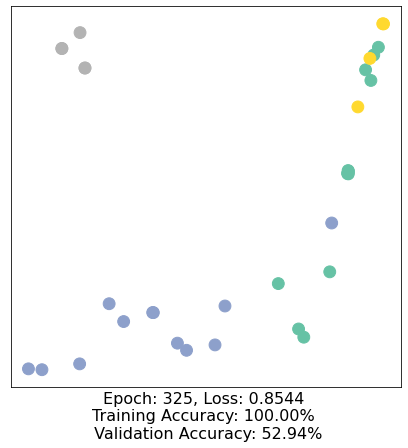

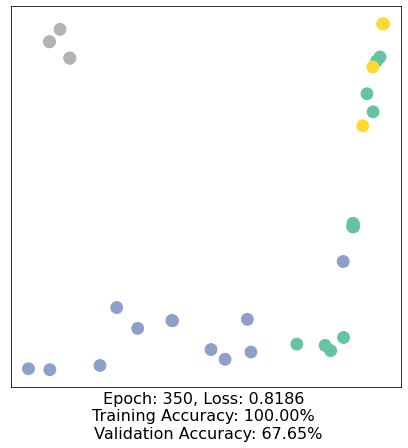

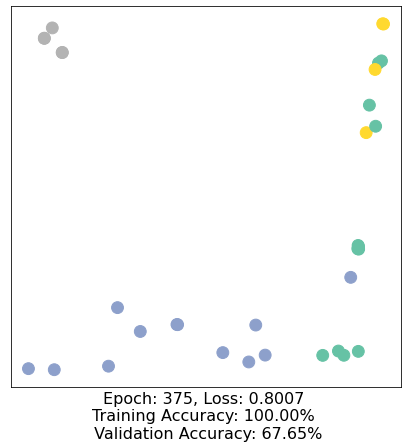

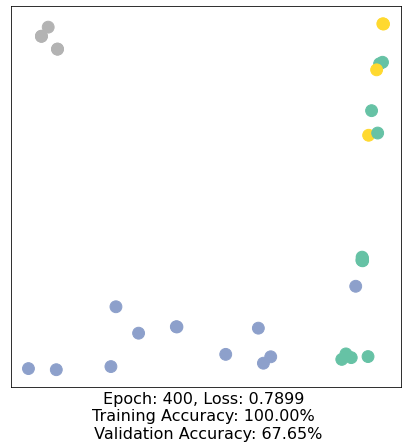

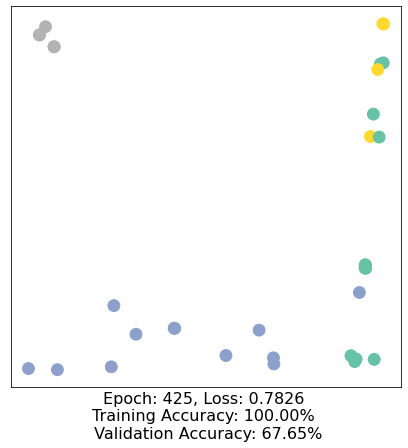

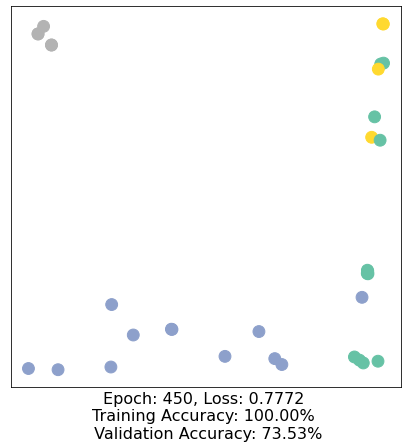

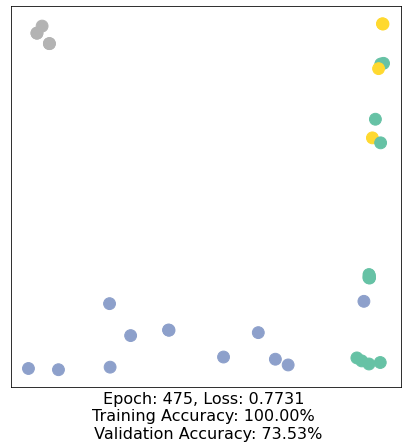

In [91]:
import time

model = GCN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def train(data):
    optimizer.zero_grad()
    out, h = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    accuracy = {}
    predicted_classes = torch.argmax(out[data.train_mask], axis=1)
    target_classes = data.y[data.train_mask]
    accuracy['train'] = torch.mean(
        torch.where(predicted_classes == target_classes, 1, 0).float())
    predicted_classes = torch.argmax(out, axis=1)
    target_classes = data.y
    accuracy['val'] = torch.mean(
        torch.where(predicted_classes == target_classes, 1, 0).float())
    return loss, h, accuracy

for epoch in range(500):
    loss, h, accuracy = train(data)
    if epoch % 25 == 0:
        visualization(h, color=data.y, epoch=epoch, loss=loss, accuracy=accuracy)
        time.sleep(0.3)